

```
# 단순회귀

#귀무가설 : 방문빈도는 총 매출액에 영향을 미치지 않는다.
#연구가설 : 방문빈도는 총 매출액에 영향을 미친다.

import pandas as pd
import statsmodels.formula.api as smf
df = pd.read_csv()
model1= smf.ols(formula= '총매출액~ 방문빈도',data = df).fit()
model1.summary()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic'


#선형회귀선 구하기
fit = np.polyfit(df['방문빈도'], df['총 매출액'], 1)
fit_fn = np.poly1d(fit)
print(np.round(fit,3))
print(fit_fn)

#산점도와 선형회귀선 그리기
%matplotlib inline
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.plot(df[], df[], 'o')
plt.plot(df[], df[]), 'r')
```



## 27회 분위수 회귀계수

- 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

> 분위수 회귀계수
- Quantile Regression은 우리가 신뢰 구간에 따른 예측을 구하고 싶거나, 종속 변수의 분포가 이분산성을 띌 때 사용한다. # 이분산성 데이터
- 선형 회귀는 대개 최소자승법(OLS)을 통해 회귀식을 만들고 예측값을 예측한다.
- 최소자승법이란 예측 값 범위 중 평균에 해당하는 값을 구하고 평균 제곱 오차(MSE) 값을 최소화하는 방
- 그렇다면 예측 값의 범위 중 중간값이나 분위값에 해당하는 값들은 구할 수가 없는 것일까? 그 정답은 분위 회귀에 있다.
- plot(등분산성 선형회귀)는 X가 증가해도 Y의 분산이 같지만, plot(이분산성 선형회귀)는 X가 증가하면 Y의 분산도 달라진다. 대개 실제 데이터셋은 A보다 B의 형태를 띄고 있다.
- 최소자승법의 회귀는 X와 Y관계의 부분적인 모습만 보여주지만 y의 분포중 다양한 부분의 관계에 관심이 있다면 QR을 통해 확인할 수 있다.
- 비정규분포를 따르고 예측변수와 비선형관계를 갖는 결과를 이해하는데 유용하다.
- Mean Squared Error 대신 median absolute Devidation 최적의 분위수 방정식을 찾기 위한 과정은 중위수 절대 편차(MAD) 값을 최소화함으로써 찾을 수 있습니다.

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [ ]:
#최소자승법
lm_ols = smf.ols('user_counts~temperature + wind + precipitation', df).fit()
lm_intercept = lm_ols.params['Intercept']
lm_weight_t = lm_ols.params['temperature']
lm_weight_w = lm_ols.params['wind']
lm_weight_p = lm_ols.params['precipitation']
print(lm_intercept,lm_weight_t,lm_weight_w,lm_weight_p)

5846.279307711709 267.4235032994644 -139.00505598529662 -73.62421313872677


In [ ]:
import statsmodels.formula.api as smf
dir(smf)#

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'conditional_logit',
 'conditional_mnlogit',
 'conditional_poisson',
 'gee',
 'glm',
 'glmgam',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

In [ ]:
help(smf.quantreg)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [ ]:
smf.quantreg() # shift+tab

In [ ]:
#분위수 회귀
q_model = smf.quantreg('user_counts~temperature + wind + precipitation',df)
quantiles = [0.25, 0.5, 0.75]
def fit_model(q) :
  res = q_model.fit(q=q) #fit은 여기서
  return [q, res.params['Intercept'], res.params['temperature'], res.params['wind'],res.params['precipitation']]

q_model = [fit_model(q) for q in quantiles]
q_model = pd.DataFrame(q_model, columns= ['q', 'intercept', 'weight_t', 'weight_w', 'weight_p'])
q_model = q_model.applymap(lambda x : round(x,2))
q_model

,q,intercept,weight_t,weight_w,weight_p
0,0.25,4679.36,252.48,-121.92,-126.88
1,0.50,5941.84,268.89,-129.41,-83.38
2,0.75,6958.72,289.41,-132.78,-50.37


In [ ]:
dir(q_model)

In [ ]:
temperature =  10.5
wind = 8.2
precipitation = 3.5

get_y = lambda x : x[0] + x[1]*temperature + x[2]*wind + x[3]*precipitation

for i in range(q_model.shape[0]) :
  user_counts = get_y(list(q_model.iloc[i, 1:]))
  print( q_model.iloc[i, 0], "분위수의 ", "user_counts : ", user_counts)

0.25 분위수의  user_counts :  5886.576
0.5 분위수의  user_counts :  7412.192999999999
0.75 분위수의  user_counts :  8732.434000000001


### IF 독립변수 하나 최소자승법

#### 1) linear regression 함수

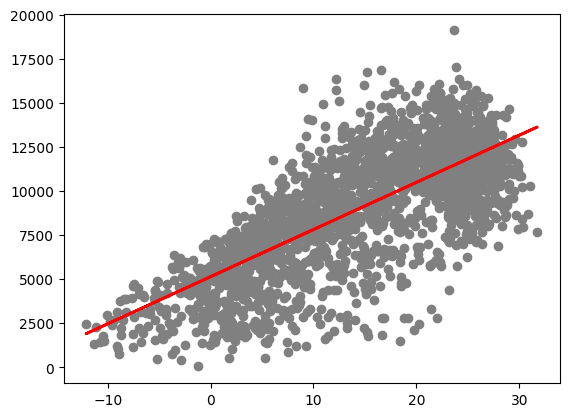

In [ ]:
#OLS 최소자승법
#원래는 train/test를 구분하는게 맞으나 해당 문제는 그걸 원하지 않아서 건너띔
X = df[['temperature']]
y = df[['user_counts']]

from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X,y)
y_pred = lm_model.predict(X)

#산점도와 회귀직선 시각
plt.scatter(X['temperature'], y, color = 'gray')
plt.plot(X['temperature'], y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
r2= metrics.r2_score(y, y_pred).round(2)
print('r2 score is {}'.format(r2))

r2 score is 0.53


#### 2) ols 함수

In [ ]:
lm_ols = smf.ols('user_counts~temperature', df).fit()
lm_ci = lm_ols.conf_int().loc['temperature'].tolist()
ols = dict(intercept = lm_ols.params['Intercept'],
           weight = lm_ols.params['temperature'],
           lower_weight = lm_ci[0],
           upper_weight = lm_ci[1])
print(ols)

{'intercept': 5147.26644791653, 'weight': 267.3807977578129, 'lower_weight': 256.5751772900245, 'upper_weight': 278.1864182256013}


### 분위수 회귀

In [ ]:
#분위수 회귀 모형
#분위수 회귀 모형 구축
q_model = smf.quantreg('user_counts~temperature',df)

#각 분위수에 따른 분위수 회귀 값 저장
quantiles = [0.25, 0.5, 0.75]
def fit_model(q) :
  res = q_model.fit(q=q)
  return [q, res.params['Intercept'], res.params['temperature']] \
  + res.conf_int().loc['temperature'].tolist()

q_model = [fit_model(q) for q in quantiles]
q_model = pd.DataFrame(q_model, columns= ['q', 'intercept', 'weight', 'lower_weight', 'upper_weight'])

print(q_model)

      q    intercept      weight  lower_weight  upper_weight
0  0.25  3756.000016  259.999999    242.197223    277.802776
1  0.50  5363.857679  263.282733    250.779309    275.786157
2  0.75  6438.611108  290.694445    280.436795    300.952094


Text(0, 0.5, 'user_counts')

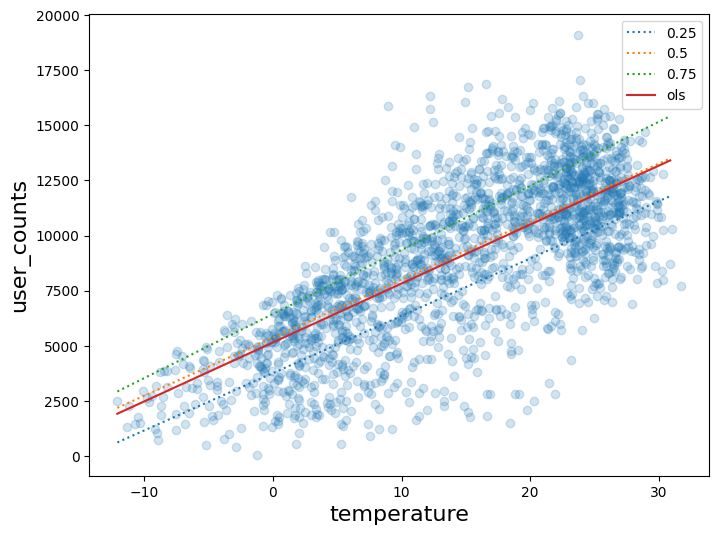

In [ ]:
#분위수 회귀선 및 선형 회귀선 시각화
x=np.arange(df.temperature.min(), df.temperature.max())
get_y = lambda a, b: a + b*x

fig, ax = plt.subplots(figsize=(8,6))

for i in range(q_model.shape[0]) :
  y= get_y(q_model.intercept[i], q_model.weight[i])
  ax.plot(x,y, linestyle='dotted', label = quantiles[i])

y = get_y(ols['intercept'], ols['weight'])
ax.plot(x,y, label = 'ols')
ax.scatter(df.temperature, df.user_counts, alpha = .2)
legend=ax.legend()
ax.set_xlabel('temperature', fontsize=16)
ax.set_ylabel('user_counts', fontsize=16)

## 26회 베이지안 회귀

height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

- 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

1. 베이지안 회귀
2. 시드넘버 1234로 지정
3. 1000번의 burn-in 이후 10,000의 MCMC를 수행
4. 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

- 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

> 균일분포
- 모든 확률변수에 대해 균일한 확률을 갖는다

> 베이지안 회귀
- 모델 불확실성에 대한 추론을 위한 체계적인 프레임워크 제공
- 회귀는 최소자승법이 잔차를 최소화시키는 방법이라면, **베이지안 회귀는 가능도 최대화가 목적**
- 최소자승법이란, 모델과 데이터와의 residual2의 합 또는 평균을 최소화하도록 파라미터를 결정하는 방법.
- 점 추정치를 학습하는 대신, 우리는 관측된 데이터와 일치하는 모수에 대한 분포를 배울 수 있다.
- 관측값을 통해 모델의 확률분포를 업데이트 하는 추론

> 사전분포
- 베이지안 방법에서는 베이지안 방법을 사용할 때 사전 분포를 선택하는 것이 중요한 단계
- 200년 전 라플라스는 "X에 대해 미리 알려진 것이 없을 때 이전 p(x)를 균일 분포로 두십시오. 즉, X의 가능한 모든 결과가 동일한 확률을 갖도록 합니다."라고 가정했습니다. 따라서 추정하려는 모수에 대한 지식이 없는 경우 사전 분포로 균일 분포를 사용합니다.
- 베이지안 통계학자들은 균일한 사전확률이 어리석다는 점에 크게 동의하고 있습니다

>MCMC샘플링
- 마르코프 체인 몬테카를로법(MCMC)
- rejection sampling이나 importance sampling과 달리 마코프 체인을 이용하는 표본 생성 방법이다.
-

In [ ]:
# pip install pymc3

In [ ]:
# !pip uninstall mkl==2018
# !pip install mkl==2017

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


In [ ]:
import pandas as pd
import pymc3 as pm
import numpy as np



# 데이터 불러오기
data_url = "https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv"
data = pd.read_csv(data_url)



# 데이터셋에서 변수 추출
height = data['height']
waist = data['waist']
weight = data['weight']



# 모델 정의
with pm.Model() as model:
    # 사전분포 설정
    beta_0 = pm.Flat('beta_0')
    beta_height = pm.Flat('beta_height')
    beta_waist = pm.Flat('beta_waist')
    sigma = pm.InverseGamma('sigma', alpha=0.005, beta=0.005)

    # 회귀식 정의
    mu = beta_0 + beta_height * height + beta_waist * waist

    # 가능도 정의
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=weight)

    # MCMC 수행
    trace = pm.sample(draws=10000, tune=1000, random_seed=1234)

# 회귀계수 추정값
beta_0_est = np.mean(trace['beta_0'])
beta_height_est = np.mean(trace['beta_height'])
beta_waist_est = np.mean(trace['beta_waist'])



print("Estimated coefficients:")
print("Intercept:", beta_0_est)
print("Coefficient for height:", beta_height_est)
print("Coefficient for waist:", beta_waist_est)



# 주어진 변수값으로 몸무게 추정
new_height = 180
new_waist = 85
predicted_weight = beta_0_est + beta_height_est * new_height + beta_waist_est * new_waist



print("Predicted weight:", predicted_weight)

In [ ]:
from logging import StringTemplateStyle
import pymc3 as pm

x = np.linspace(start=0, stop=10, num=size)

#파라미터 값으로는 보통 정규분포나 균등분포와 같이 정보가 없는 분포를 주로 사용
with pm.Model() as model :
  #PyMC3의 모형은 with 문 안에서 사용된다.
  #사전확률 분포(prior probability) 설계
  alpha = pm.Normal('theta1' , mu = 0, sd =10)
  beta = pm.Normal('theta2', mu=0, sd = 10)
  sigma = pm.HalfCauchy('sigma', 1) #오차항의 분산

  #모델 구성
  y_est = alpha * x + beta  # ax_1 +bx_2 + beta

  #likelihood distribution(가능도 분포 정의)
  #차이점은 observed가 있다는 점.
  lkelihood = pm.Normal('y', mu = y_est, sd = sigma, observed=y)

  # # 최적화를 사용하여 시작값 추정
  # start = pm.find_MAP()

  # # NUTS MCMC 샘플링 알고리즘 인스턴스 생성
  # step = pm.NUTS(scaling=start)

  #mcmc sampling 샘플링을 사용하여 n개의 사후 샘플 생성
  #chains 수만큼 색상의 그래프가 보인다.
  trace = pm.sample(10000, progressbar=True, chains=2, cores=1, start=start,  step=step)

  #theta1, theta2, sigma 의 샘플링이 이루고 있는 사후분포를 왼쪽 3개의 그래프에서 확인할수 있다.
  #우리가 설정한 값이 2,1,0,5였으므로 대략적으로 오랍른 값 주변으로 mcmc 샘플링이 이뤄진 것을 볼 수 있다.
  #오른쪽 3개 그래프는 각 마르코프 체인 샌플링 과정을 보여준다.
  # 샘플링 과정에서 나온 sample value 를 histogram으로 나타낸 것이 왼쪽 그래프이다.
  pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2}, figsize=(8, 8))
  plt.show()

## 24회 다중회귀

광고횟수와 광고비에 따른 매출액의 데이터이다

- 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- 회귀식이 유의한지 판단
- 귀무가설 : 광고횟수, 광고비는 매출액에 영향을 미치지 않는다.
- 연구가설 : 광고횟수, 광고비는 매출액에 영향을 미친다.

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


In [ ]:
df.광고비.value_counts()

높음    6
낮음    5
Name: 광고비, dtype: int64

In [ ]:
#더미변수 생성
df2 = pd.get_dummies(df['광고비'], prefix='광고비', drop_first=True)
df2.head()

,광고비_높음
0,0
1,0
2,0
3,1
4,1


In [ ]:
df3 =pd.concat([df, df2], axis=1).drop(['광고비'], axis=1)
df3.head()

,광고횟수,매출액,광고비_높음
0,2,15,0
1,3,16,0
2,4,17,0
3,4,18,1
4,5,20,1


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula = '매출액 ~ 광고횟수+광고비_높음', data=df3).fit()
model.summary()
#F 값이 221,Prob(F-statistic)>0.05이므로 회귀모형은 유의하고,
#Adj.R-squared 기준으로 설명력은 약 98%정도이다.
#두번째 표를 보면 절편과 각 독립변수 회귀계수(coefficient)가
#95%신뢰수준에서 유의하게 평가되었고, 도출된 다중회귀 모형은
# Y=0.5227*광고비_높음+1.4350*광고횟수+12.1641임을 알 수 있다.
#잔차통계량 확인 결과 Prob(Omnibus)이 0.05이하이므로
#잔차의 분포가 정규분포로 보기는 어렵다.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           9.96e-08
Time:                        02:23:37   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1641      0.556     21.876      0.000      10.882      13.446
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_높음         0.5227      0.536      0.975      0.358      -0.713       1.759
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중공선성(VIF 분산평창값) 확인하기
y, X = dmatrices('매출액 ~ 광고횟수+광고비_높음', data = df3, return_type = 'dataframe' )

print(np.round(variance_inflation_factor(X.values, 1),3)) #광고횟수 VIF 값
print(np.round(variance_inflation_factor(X.values, 2),3)) #광고비_높음 VIF 값
#광고횟수와 광고비_높음 에 대한 VIF값이 모두 10 한참이하이므로
# 다중공선성 문제는 없다.

1.122
1.122


## 17회 교호작용항

- 2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB
None


,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474



모든 컬럼은 numeric 변수이다. 이상치가 존재하는 컬럼은 ~~ 이다. (중략)



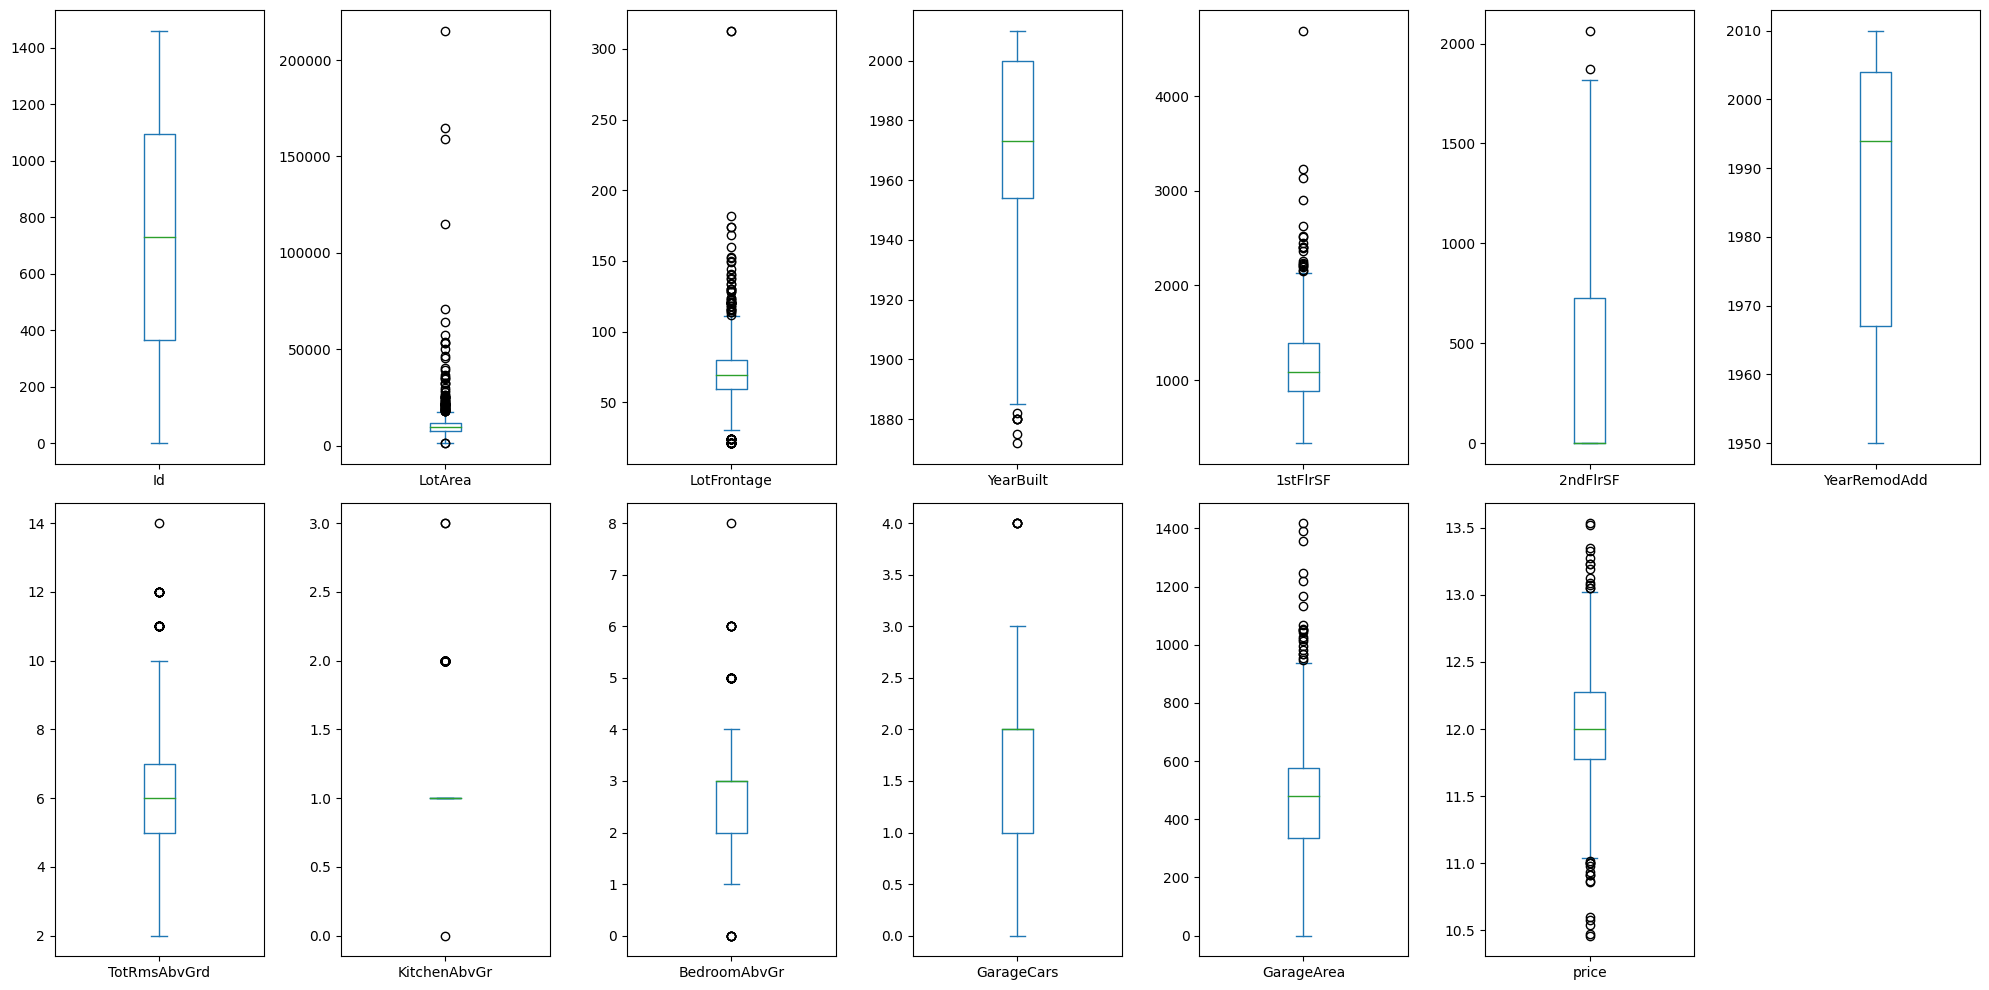

In [ ]:
print(df.info())
display(df.describe())

import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()

스케일링 전 시각화


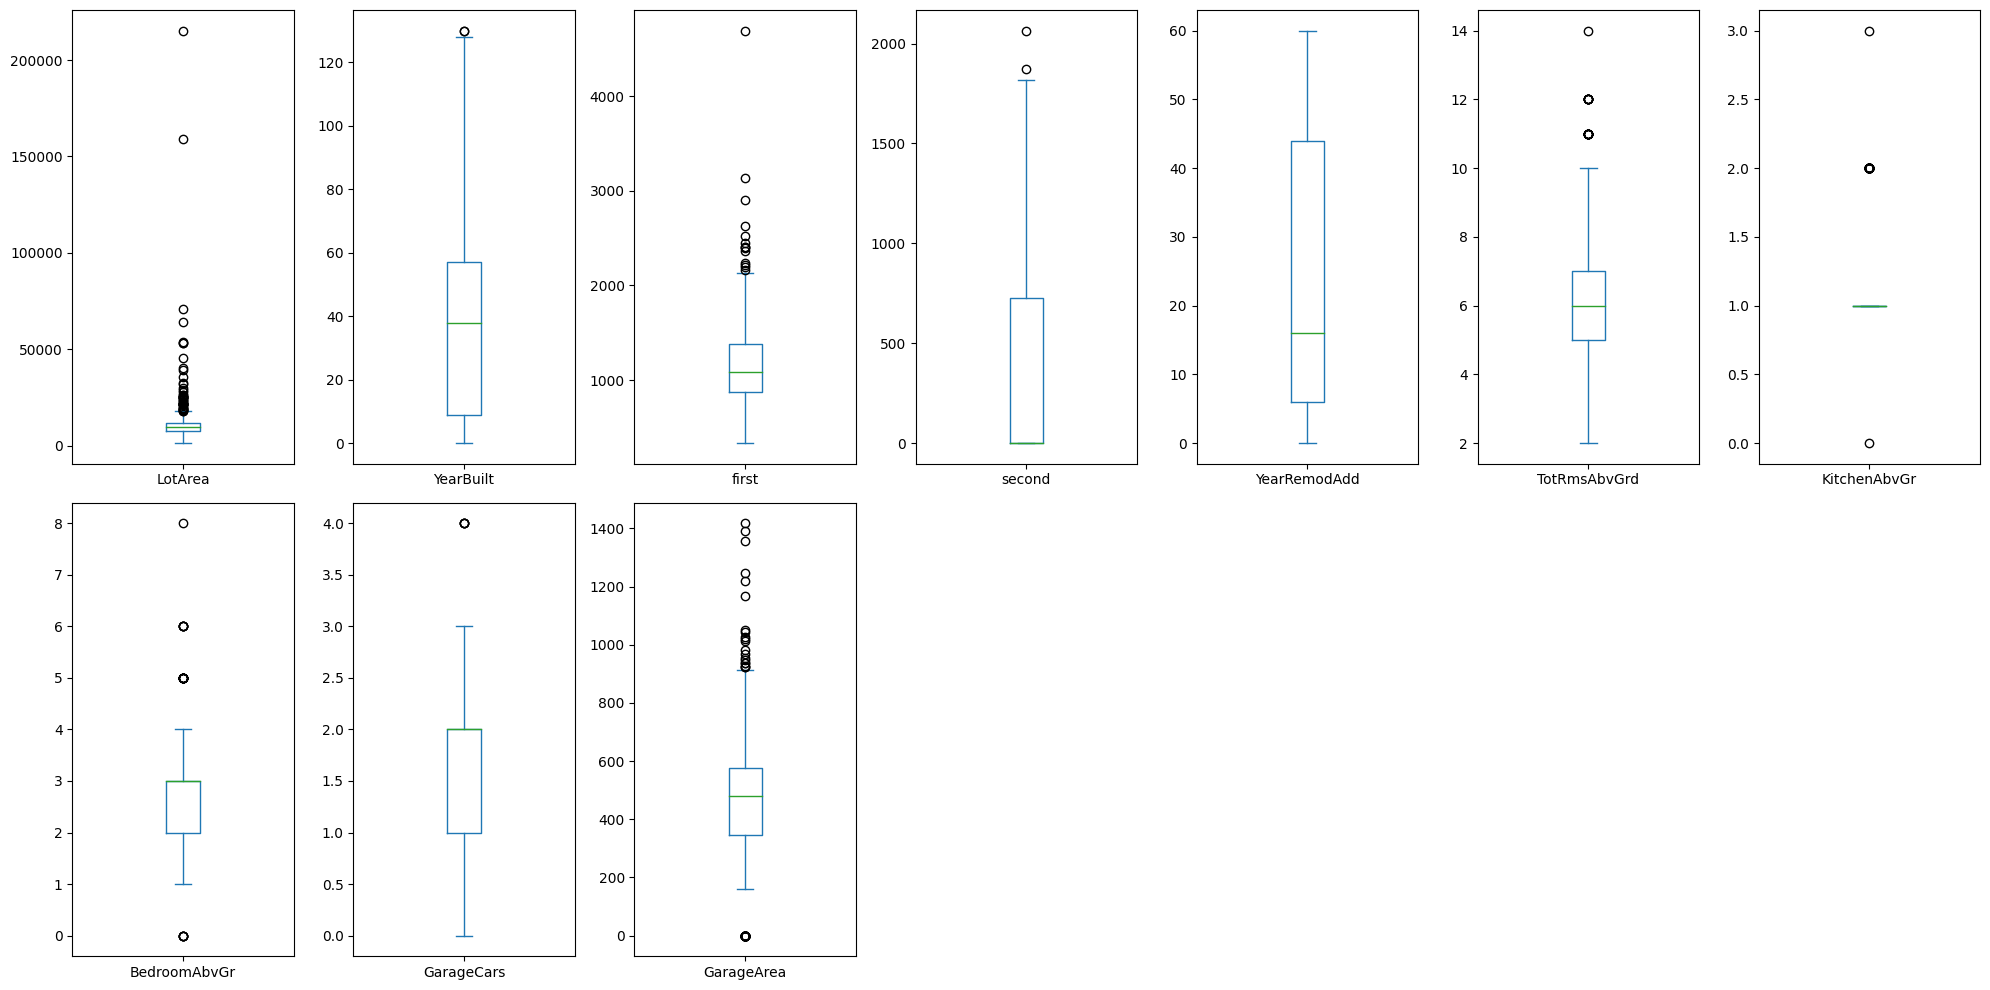

스케일링 후 시각화


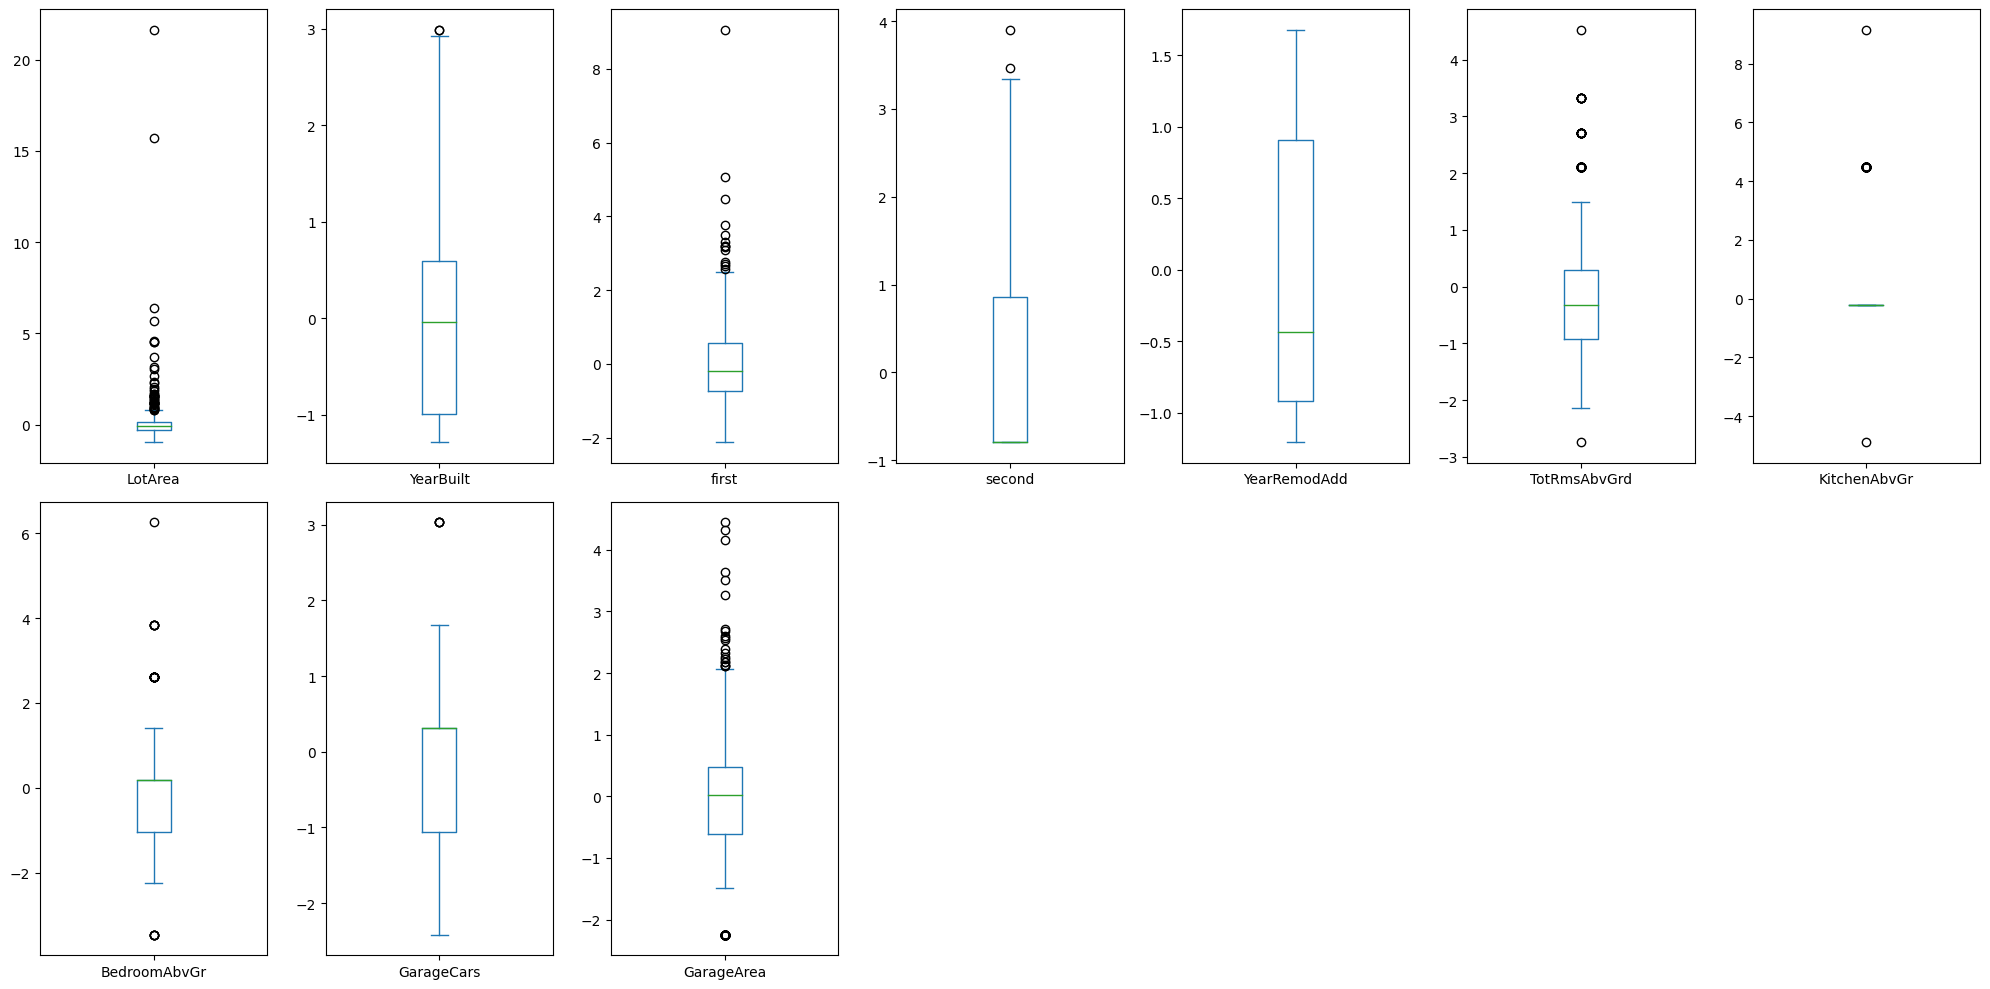

In [ ]:
df2 = df.copy()

#컬럼에 숫자가 들어가면 statsmodels ols 동작시 에러발생
df2 = df2.rename(columns={'1stFlrSF':'first','2ndFlrSF':'second'})

#년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체
df2['YearBuilt']  = abs(df2['YearBuilt'] - df2['YearBuilt'].max())
df2['YearRemodAdd']  = abs(df2['YearRemodAdd'] - df2['YearRemodAdd'].max())


X = df2.drop(columns=['Id','price','LotFrontage'])
y = df2['price']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test , y_train, y_test = train_test_split(X,y)

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print('스케일링 전 시각화')
X_train.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()
print('스케일링 후 시각화')
pd.DataFrame(X_train_sc,columns=X_train.columns)
df.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()


In [ ]:
from itertools import permutations
comb= list(permutations(X_train.columns,3))
len(comb)
comb[:5]

[('LotArea', 'YearBuilt', 'first'),
 ('LotArea', 'YearBuilt', 'second'),
 ('LotArea', 'YearBuilt', 'YearRemodAdd'),
 ('LotArea', 'YearBuilt', 'TotRmsAbvGrd'),
 ('LotArea', 'YearBuilt', 'KitchenAbvGr')]

In [ ]:
variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb[:5]])
from statsmodels.formula.api import ols

res = ols(f'price ~ {variables}', data=pd.concat([X_train,y_train],axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     265.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:38:58   Log-Likelihood:                 286.15
No. Observations:                1095   AIC:                            -540.3
Df Residuals:                    1079   BIC:                            -460.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         11.7003      0.052    226.348      0.000      11.599      11.802
LotArea                        -3.303e-06   1.69e-06     -1.956      0.051   -6.62e-06    1.09e-08
YearBuilt                         -0.0045      0.000    -10.173      0.000      -0.005      -0.004
first                              0.0004   2.85e-05     14.280      0.000       0.000       0.000
second                             0.0002   2.87e-05      7.889      0.000       0.000       0.000
YearRemodAdd                      -0.0042      0.001     -7.738      0.000      -0.005      -0.003
TotRmsAbvGrd                       0.0372      0.009      4.144      0.000       0.020       0.055
KitchenAbvGr                      -0.3310      0.045     -7.334      0.000      -0.420      -0.242
BedroomAbvGr                      -0.0168      0.010     -1.690      0.091      -0.036       0.003
GarageCars                         0.0927      0.017      5.525      0.000       0.060       0.126
GarageArea                      1.625e-05    5.7e-05      0.285      0.776   -9.57e-05       0.000
LotArea:YearBuilt:first         3.734e-11    4.6e-11      0.812      0.417   -5.29e-11    1.28e-10
LotArea:YearBuilt:second        1.315e-10   4.46e-11      2.949      0.003     4.4e-11    2.19e-10
LotArea:YearBuilt:YearRemodAdd  2.314e-09   7.14e-10      3.242      0.001    9.13e-10    3.71e-09
LotArea:YearBuilt:TotRmsAbvGrd -2.886e-08   1.29e-08     -2.236      0.026   -5.42e-08   -3.53e-09
LotArea:YearBuilt:KitchenAbvGr  1.766e-07   6.27e-08      2.815      0.005    5.35e-08       3e-07
==============================================================================
Omnibus:                      548.551   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9449.401
Skew:                          -1.883   Prob(JB):                         0.00
Kurtosis:                      16.890   Cond. No.                     1.12e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""